In [190]:
import numpy as np
import plotnine
import pandas as pd
from plotnine import *

In [191]:
from google.colab import files
uploaded = files.upload()

Saving avocado-updated-2020.csv to avocado-updated-2020 (4).csv


In [192]:
avocados = pd.read_csv('avocado-updated-2020.csv')

**1. Describe the Data**

The avocado prices dataset shows weekly sales information for Hass avocados in different parts of the U.S. from 2015 to 2018. It includes data on the average price, total number sold, and how many were sold in each size category (small, large, and extra large). It also tells whether the avocados were organic or conventional, and lists the region and date for each record. This information helps show how avocado prices and sales changed over time and across different areas.

In [193]:
avocados = avocados.rename(columns= {
    "4046": "small",
    "4225": "large",
    "4770": "Xlarge"
})

In [194]:
avocados.head()

,date,average_price,total_volume,small,large,Xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [195]:
avocados['geography'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

Create new variable to group the geography locastions into a geo_type variable.

In [196]:
geo_map = {
    "Total U.S.": "US",

    "West Tex/New Mexico": "region",
    "West": "region",
    "Northeast": "region",
    "Southeast": "region",
    "South Central": "region",
    "Midsouth": "region",
    "Great Lakes": "region",
    "Plains": "region",

    "California": "state",
    "South Carolina": "state",
}

# everything else = city
avocados["geo_type"] = avocados["geography"].map(geo_map).fillna("city")

In [197]:
avocados.head()

,date,average_price,total_volume,small,large,Xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,city
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,city
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,city
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,city
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,city


Melt data into Long form for "size"

In [198]:
size_map = {
    "small": "small",
    "large": "large",
    "Xlarge": "Xlarge"
}

# only melt the PLU columns that actually exist
present_plu = [plu for plu in size_map if plu in avocados.columns]
id_vars = avocados.columns.difference(present_plu, sort=False)

avocados_long = (
    avocados.melt(id_vars=id_vars, value_vars=present_plu,
                  var_name="plu", value_name="units")
            .assign(size=lambda d: d["plu"].map(size_map))
            .drop(columns="plu")
)

In [199]:
avocados_long.head()

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,units,size
0,2015-01-04,1.22,40873.28,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,city,2819.50,small
1,2015-01-04,1.79,1373.95,1162.65,1162.65,0.00,0.0,organic,2015,Albany,city,57.42,small
2,2015-01-04,1.00,435021.49,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,city,364302.39,small
3,2015-01-04,1.76,3846.69,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,city,1500.15,small
4,2015-01-04,1.08,788025.06,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,city,53987.31,small


**Exercises**

Which major geographical region sold the most total organic, small Hass avocados in 2017?



In [200]:
org_sm_2017 = avocados_long[(avocados_long['year'] == 2017) &
 (avocados_long['type'] == 'organic') &
  (avocados_long['size'] == 'small') & (avocados_long['geo_type'] != 'US')]

org_sm_2017.sort_values('units', ascending=False).head(10)

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,units,size
12046,2017-02-19,1.43,592952.35,102105.79,91672.29,10433.50,0.0,organic,2017,Northeast,region,127051.75,small
12044,2017-02-19,1.36,420410.54,30805.24,29223.40,1581.84,0.0,organic,2017,New York,city,100285.03,small
13280,2017-05-07,1.19,442825.93,286038.82,84763.47,201275.35,0.0,organic,2017,West,region,85438.01,small
13496,2017-05-21,1.52,252331.06,131259.05,19903.15,111355.90,0.0,organic,2017,West,region,72450.49,small
13388,2017-05-14,1.10,446864.94,328333.53,160414.47,167919.06,0.0,organic,2017,West,region,64155.43,small
13604,2017-05-28,1.48,276578.14,159241.11,22367.60,136873.51,0.0,organic,2017,West,region,64107.88,small
13172,2017-04-30,1.40,259279.19,146041.51,37095.98,108945.53,0.0,organic,2017,West,region,61897.14,small
12308,2017-03-05,0.99,367519.17,251101.90,112844.19,138257.71,0.0,organic,2017,West,region,61166.48,small
13820,2017-06-11,1.59,260068.85,159121.26,29519.07,129602.19,0.0,organic,2017,West,region,52927.66,small
12726,2017-04-02,1.14,169883.35,112789.76,101411.38,11378.38,0.0,organic,2017,South Central,region,50715.72,small


**Northeast**

Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [201]:
avocados['month'] = pd.DatetimeIndex(avocados['date']).month
avocados['day'] = pd.DatetimeIndex(avocados['date']).day
avocados['year'] = pd.DatetimeIndex(avocados['date']).year
avocados.head()

,date,average_price,total_volume,small,large,Xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,month,day
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,city,1,4
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,city,1,4
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,city,1,4
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,city,1,4
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,city,1,4


In [202]:
avocados.groupby('month')['total_volume'].mean().sort_values(ascending=False)


,total_volume
month,
5,1.123632e+06
2,1.095374e+06
6,1.051247e+06
4,1.016582e+06
3,9.957150e+05
1,9.853122e+05
7,9.832681e+05
8,9.499249e+05
9,9.064773e+05


**May**

Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [203]:
avocados_metro = avocados_long[avocados_long['geo_type'] == 'city']
avocados_metro.head()

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,units,size
0,2015-01-04,1.22,40873.28,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,city,2819.50,small
1,2015-01-04,1.79,1373.95,1162.65,1162.65,0.00,0.0,organic,2015,Albany,city,57.42,small
2,2015-01-04,1.00,435021.49,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,city,364302.39,small
3,2015-01-04,1.76,3846.69,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,city,1500.15,small
4,2015-01-04,1.08,788025.06,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,city,53987.31,small


In [204]:
avocados_metro.groupby('geography')['units'].mean().sort_values(ascending=False).head(5)

,units
geography,
Los Angeles,291520.101776
New York,193618.226710
Dallas/Ft. Worth,156090.855741
Houston,146397.885703
Phoenix/Tucson,139964.304684


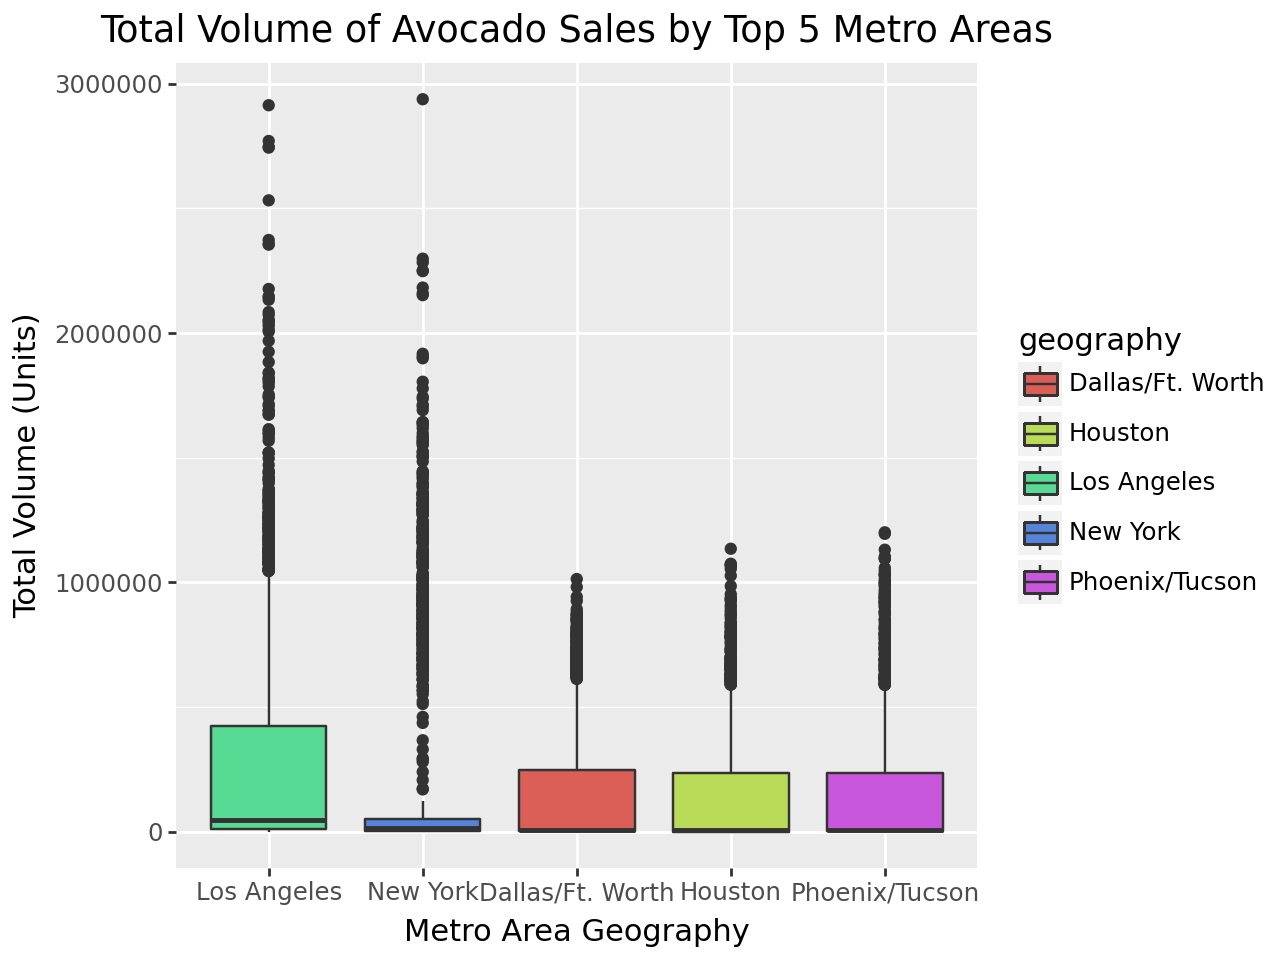

In [205]:
# Get the top 5 metro geographies based on mean units sold
top5_geographies = avocados_metro.groupby('geography')['units'].mean().sort_values(ascending=False).head(5).index.tolist()

# Filter to include only the top 5
avocados_top5 = avocados_metro[avocados_metro['geography'].isin(top5_geographies)]

# Calculate the order based on the mean units
geography_order = avocados_top5.groupby('geography')['units'].mean().sort_values(ascending=False).index.tolist()


# Create the box plot
(
    ggplot(avocados_top5, aes(x='geography', y='units', fill='geography'))
    + geom_boxplot()
    + scale_x_discrete(limits=geography_order) # Reorder x-axis based on mean units
    + labs(x='Metro Area Geography', y='Total Volume (Units)', title='Total Volume of Avocado Sales by Top 5 Metro Areas')

)

From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [206]:
california_geographies = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']
avocados_ca_long = avocados_long[avocados_long['geography'].isin(california_geographies)]
avocados_ca_long.head()

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,units,size
44,2015-01-04,0.85,2682159.95,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,city,1837999.65,small
45,2015-01-04,1.25,54495.54,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,city,47721.51,small
80,2015-01-04,1.05,430138.88,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,city,110693.69,small
81,2015-01-04,1.33,9213.49,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,city,3727.52,small
82,2015-01-04,0.94,461607.33,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,city,244152.26,small


In [207]:
california_geographies = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']
avocados_ca_wide = avocados[avocados['geography'].isin(california_geographies)]
avocados_ca_wide.head()

,date,average_price,total_volume,small,large,Xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,city,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,city,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,city,1,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,city,1,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,city,1,4


In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [209]:
avocados_ca_wide.groupby(['geography'])[["average_price"]].mean().sort_values('average_price', ascending=False)

,average_price
geography,
San Francisco,1.759967
Sacramento,1.584608
San Diego,1.456111
Los Angeles,1.311013


In [210]:
avo_ca_mean = avocados_ca_wide.groupby(['geography'])[["average_price"]].mean().sort_values('average_price', ascending=False)


In [211]:
avo_ca_mean.head()

,average_price
geography,
San Francisco,1.759967
Sacramento,1.584608
San Diego,1.456111
Los Angeles,1.311013


In [212]:
avocados_ca_type_mean = avocados_ca_wide.groupby(['geography', 'type'])['average_price'].mean().unstack()

avocados_ca_type_mean['price_difference'] = avocados_ca_type_mean['organic'] - avocados_ca_type_mean['conventional']

print("Average price of organic vs conventional avocados and their difference:")
display(avocados_ca_type_mean.sort_values('price_difference', ascending=False))

Average price of organic vs conventional avocados and their difference:


type,conventional,organic,price_difference
geography,,,
San Francisco,1.400490,2.119444,0.718954
San Diego,1.113856,1.798366,0.684510
Sacramento,1.295359,1.873856,0.578497
Los Angeles,1.047124,1.574902,0.527778


**San Francisco**

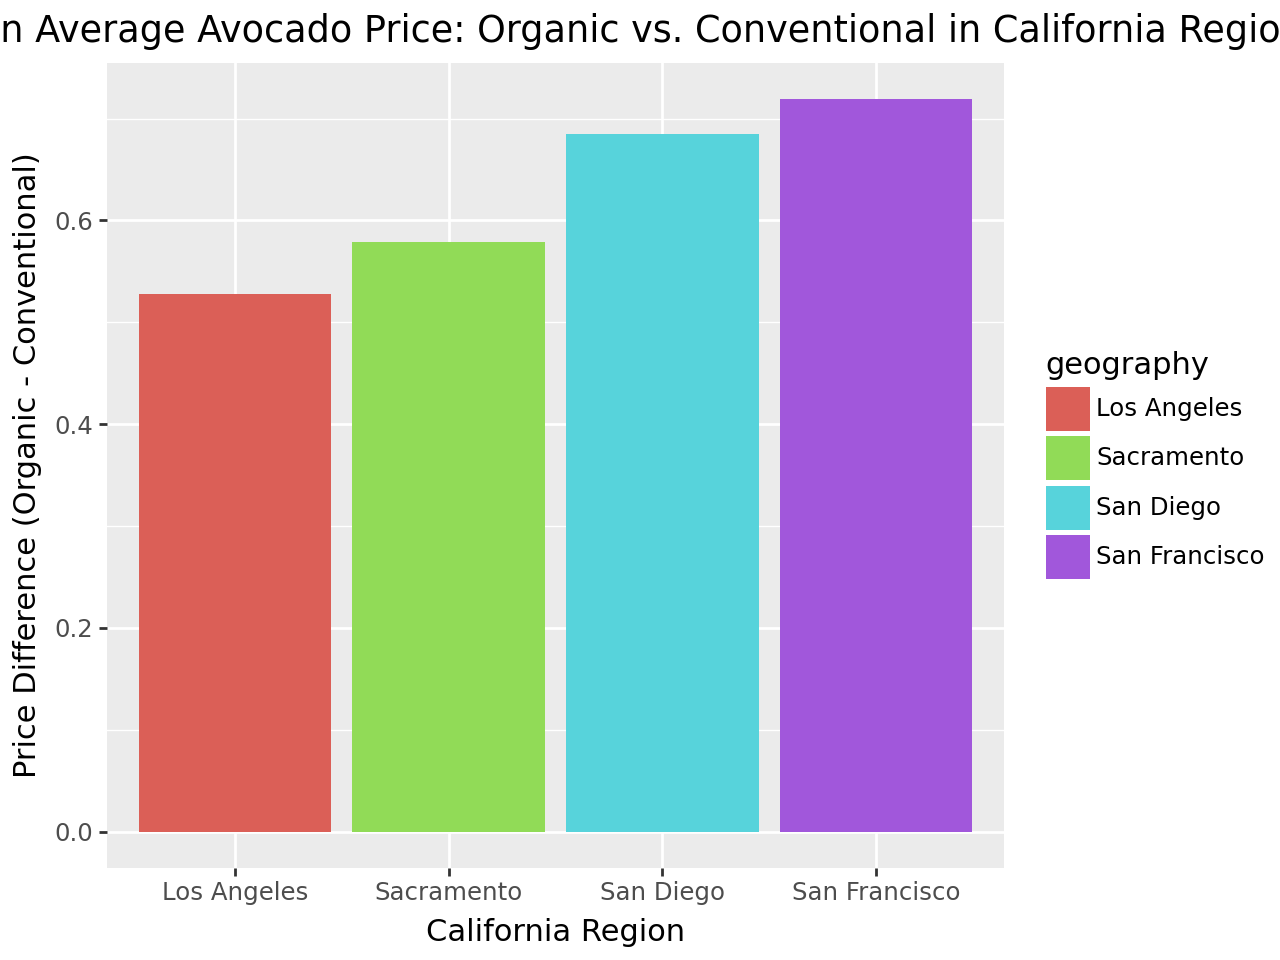

In [213]:
(
    ggplot(avocados_ca_type_mean.reset_index(), aes(x='geography', y='price_difference', fill='geography'))
    + geom_bar(stat='identity')
    + labs(x='California Region', y='Price Difference (Organic - Conventional)', title='Difference in Average Avocado Price: Organic vs. Conventional in California Regions')

)

The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

In [215]:
# Group by geography, type, and size, then sum the units
avocados_ca_grouped = avocados_ca_long.groupby(['geography', 'type', 'size'])['units'].sum().reset_index()

# Calculate the total units sold for each geography and type
avocados_ca_total = avocados_ca_long.groupby(['geography', 'type'])['units'].sum().reset_index(name='total_units')

# Merge the grouped data with the total units
avocados_ca_proportions = pd.merge(avocados_ca_grouped, avocados_ca_total, on=['geography', 'type'])

# Calculate the proportion of each size
avocados_ca_proportions['proportion'] = avocados_ca_proportions['units'] / avocados_ca_proportions['total_units']

# Display the resulting DataFrame with proportions
display(avocados_ca_proportions)

,geography,type,size,units,total_units,proportion
0,Los Angeles,conventional,Xlarge,2.970453e+07,5.244437e+08,0.056640
1,Los Angeles,conventional,large,1.358157e+08,5.244437e+08,0.258971
2,Los Angeles,conventional,small,3.589234e+08,5.244437e+08,0.684389
3,Los Angeles,organic,Xlarge,1.846800e+03,1.078721e+07,0.000171
4,Los Angeles,organic,large,6.366092e+06,1.078721e+07,0.590152
5,Los Angeles,organic,small,4.419272e+06,1.078721e+07,0.409677
6,Sacramento,conventional,Xlarge,1.937984e+06,1.195302e+08,0.016213
7,Sacramento,conventional,large,7.435955e+07,1.195302e+08,0.622099
8,Sacramento,conventional,small,4.323263e+07,1.195302e+08,0.361688
9,Sacramento,organic,Xlarge,2.364400e+02,2.170262e+06,0.000109


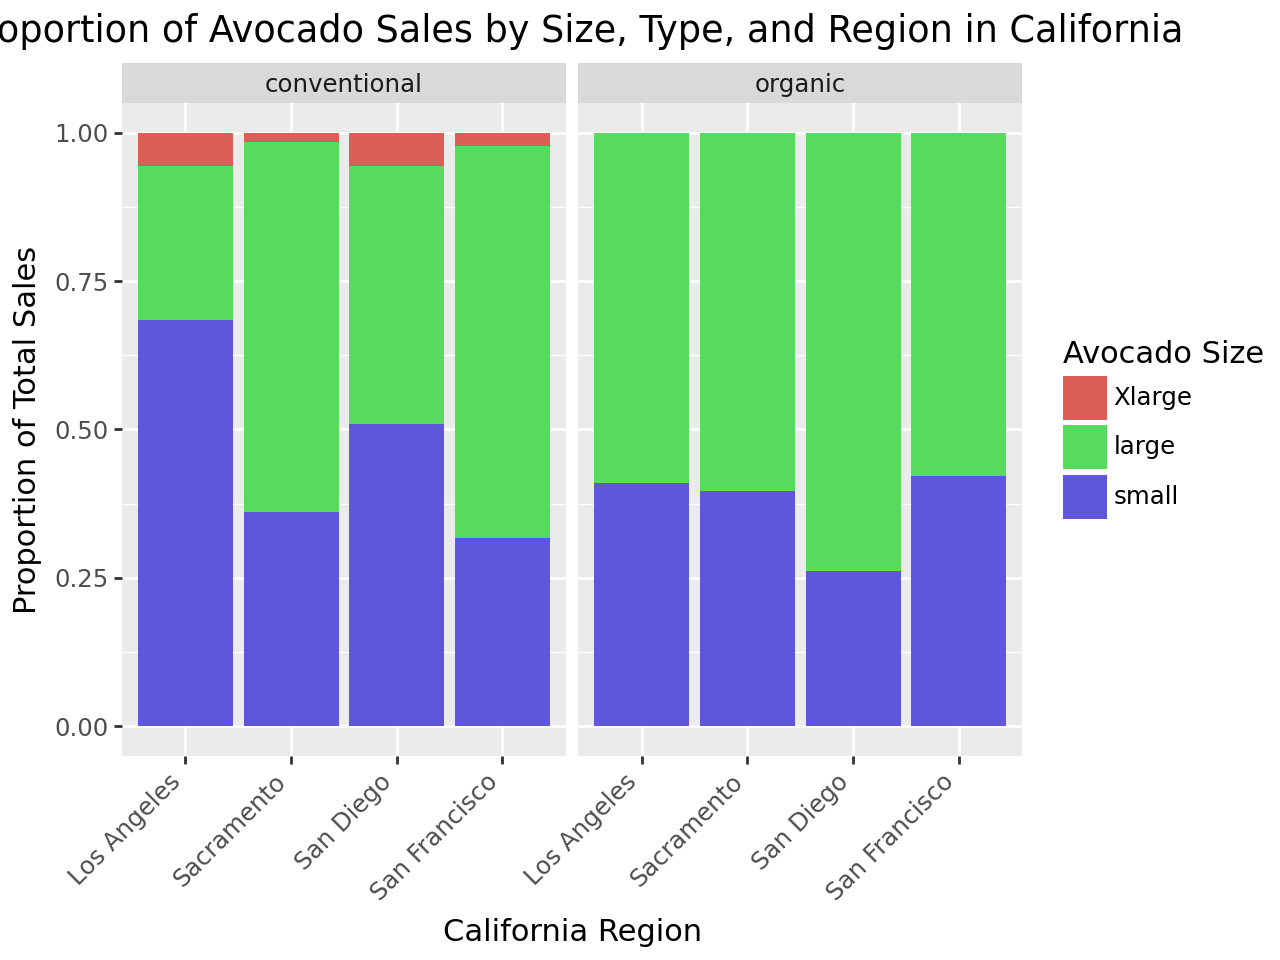

In [222]:
# Create the plot using the calculated proportions
(
    ggplot(avocados_ca_proportions, aes(x='geography', y='proportion', fill='size'))
    + geom_bar(stat='identity')
    + facet_wrap('~ type')
    + labs(x='California Region', y='Proportion of Total Sales', fill='Avocado Size',
           title='Proportion of Avocado Sales by Size, Type, and Region in California')
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

Using Outside Data

A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.

Find or assemble a data set of real data, with house prices for these four California regions. Join this data set with your California avocado data set.

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.

In [251]:
from google.colab import files
uploaded = files.upload()

Saving housing.xlsx to housing.xlsx


In [253]:
%pip install openpyxl

In [254]:
housing = pd.read_excel('housing.xlsx')
housing.head()

,Unnamed: 0,Month of Period End,Month of Period End.1,Month of Period End.2,Month of Period End.3,Month of Period End.4,Month of Period End.5,Month of Period End.6,Month of Period End.7,Month of Period End.8,...,Month of Period End.62,Month of Period End.63,Month of Period End.64,Month of Period End.65,Month of Period End.66,Month of Period End.67,Month of Period End.68,Month of Period End.69,Month of Period End.70,Month of Period End.71
0,Region,2025-01-15 00:00:00,2025-02-15 00:00:00,2025-03-15 00:00:00,2025-04-15 00:00:00,2025-05-15 00:00:00,2025-06-15 00:00:00,2025-07-15 00:00:00,2025-08-15 00:00:00,2025-09-15 00:00:00,...,2025-03-20 00:00:00,2025-04-20 00:00:00,2025-05-20 00:00:00,2025-06-20 00:00:00,2025-07-20 00:00:00,2025-08-20 00:00:00,2025-09-20 00:00:00,2025-10-20 00:00:00,2025-11-20 00:00:00,2025-12-20 00:00:00
1,"Los Angeles, CA metro area",$465K,$470K,$480K,$495K,$494K,$507K,$505K,$510K,$499K,...,$660K,$650K,$635K,$655K,$700K,$710K,$730K,$735K,$718K,$730K
2,"Sacramento, CA metro area",$285K,$310K,$305K,$315K,$325K,$325K,$319K,$318K,$315K,...,$430K,$430K,$429K,$445K,$465K,$468K,$471K,$479K,$474K,$475K
3,"San Diego, CA metro area",$442K,$442K,$460K,$460K,$469K,$480K,$480K,$470K,$464K,...,$599K,$610K,$598K,$609K,$642K,$654K,$662K,$660K,$660K,$660K
4,"San Francisco, CA metro area",$925K,"$1,050K","$1,100K","$1,115K","$1,195K","$1,139K","$1,145K","$1,113K","$1,088K",...,"$1,450K","$1,400K","$1,500K","$1,549K","$1,450K","$1,513K","$1,450K","$1,418K","$1,400K","$1,350K"


In [275]:
# CELL 0 — imports & helpers
!pip -q install plotnine

import re, numpy as np, pandas as pd
from plotnine import (
    ggplot, aes, geom_point, geom_smooth, facet_wrap,
    theme_bw, labs, theme, element_text
)

CITIES = ["Los Angeles","San Diego","Sacramento","San Francisco"]

def standardize_geo(s: str) -> str:
    s = str(s)
    s = re.sub(r",.*$", "", s)          # drop ", CA metro area", etc.
    s = s.replace(" metro area","")
    s = (s.replace("LosAngeles","Los Angeles")
           .replace("SanDiego","San Diego")
           .replace("SanFrancisco","San Francisco"))
    return s.strip()

def parse_month(s):
    s = str(s)
    if re.fullmatch(r"[A-Za-z]{3}-\d{2}", s):   # e.g., Jan-15
        return pd.to_datetime(s, format="%b-%y")
    if re.fullmatch(r"\d{4}-\d{2}", s):         # e.g., 2015-01
        return pd.to_datetime(s, format="%Y-%m")
    return pd.to_datetime(s, errors="coerce")

def parse_price(s):
    if pd.isna(s): return np.nan
    st = str(s).strip().replace("$","").replace(",","")
    if st in {"","—","-","NA","N/A"}: return np.nan
    mult = 1.0
    if st[-1:].lower() == "k": mult, st = 1_000.0, st[:-1]
    if st[-1:].lower() == "m": mult, st = 1_000_000.0, st[:-1]
    try: return float(st) * mult
    except: return np.nan

def corr_by_city(df, x, y, outname):
    out = (df.groupby("geography")
             .apply(lambda d: d[x].corr(d[y]))
             .reset_index(name=outname)
             .sort_values("geography"))
    return out


In [276]:
# CELL 2 — housing tidy monthly
# Promote first row to header if it contains 'Region'
if (housing.shape[0] > 0) and housing.iloc[0].astype(str).str.fullmatch(r"(?i)region").any():
    headers = housing.iloc[0].astype(str).tolist()
    housing_wide = housing.iloc[1:].copy()
    housing_wide.columns = headers
else:
    # if headers likely already present
    if "Region" in housing.columns:
        housing_wide = housing.copy()
    else:
        # assume first column is the region
        housing_wide = housing.copy()
        cols = housing_wide.columns.tolist()
        housing_wide.columns = ["Region"] + [f"col_{i}" for i in range(1, len(cols))]

value_cols = [c for c in housing_wide.columns if c != "Region"]
rf_long = housing_wide.melt(id_vars="Region", value_vars=value_cols,
                            var_name="month_label", value_name="price_str")

rf_long["geography"] = rf_long["Region"].map(standardize_geo)
rf_long["month"] = rf_long["month_label"].map(parse_month).dt.to_period("M").dt.to_timestamp()
rf_long["median_house_price"] = rf_long["price_str"].apply(parse_price)

houses_m = (rf_long.dropna(subset=["geography","month"])
                    .groupby(["geography","month"], as_index=False)
                    .agg(median_house_price=("median_house_price","mean")))

houses_m = houses_m[houses_m["geography"].isin(CITIES)].copy()

print("houses_m (monthly) preview:")
display(houses_m.head(6))


houses_m (monthly) preview:


,geography,month,median_house_price


In [277]:
# CELL 3 — avocados tidy monthly (handles wide or long) chatgpt helped with this info
def norm(s): return "".join(ch for ch in str(s).lower() if ch.isalnum())

if "avocado_ca_wide" in globals():
    wide = avocado_ca_wide.copy()

    if "month" not in wide.columns:
        date_col = next(c for c in ["date","Date","week","Week"] if c in wide.columns)
        wide["month"] = pd.to_datetime(wide[date_col], errors="coerce").dt.to_period("M").dt.to_timestamp()
    # wide -> long
    av_m = (wide.melt(id_vars=["geography","month"], var_name="metric", value_name="value")
                  .assign(
                      type=lambda d: d["metric"].str.rsplit("_", n=1).str[-1],
                      metric_name=lambda d: d["metric"].str.rsplit("_", n=1).str[0]
                  )
                  .pivot_table(index=["geography","month","type"], columns="metric_name", values="value", aggfunc="first")
                  .reset_index())
    rename_map = {
        "avg_price":"avg_avocado_price",
        "average_price":"avg_avocado_price",
        "total_units":"total_volume",
        "total_volume":"total_volume",
    }
    av_m = av_m.rename(columns=rename_map)
else:

    nmap = {norm(c): c for c in avocados.columns}
    date_col   = nmap.get("date") or nmap.get("week") or "date"
    region_col = nmap.get("geography") or nmap.get("region") or "geography"
    price_col  = nmap.get("averageprice") or nmap.get("average_price") or "average_price"
    vol_col    = nmap.get("totalvolume") or nmap.get("total_volume") or "total_volume"
    type_col   = nmap.get("type") or "type"

    avo = avocados.rename(columns={region_col:"geography",
                                   price_col:"average_price",
                                   vol_col:"total_volume",
                                   type_col:"type"}).copy()
    avo["month"] = pd.to_datetime(avo[date_col], errors="coerce").dt.to_period("M").dt.to_timestamp()
    avo["geography"] = avo["geography"].map(standardize_geo)
    avo["type"] = avo["type"].astype(str).str.lower()
    avocado_ca = avo[avo["geography"].isin(CITIES)].copy()

    av_m = (avocado_ca.groupby(["geography","type","month"], as_index=False)
              .agg(avg_avocado_price=("average_price", "mean"),
                   total_volume=("total_volume", "sum")))

print("av_m (monthly) preview:")
display(av_m.head(6))


av_m (monthly) preview:


,geography,type,month,avg_avocado_price,total_volume
0,Los Angeles,conventional,2015-01-01,0.8875,10526526.34
1,Los Angeles,conventional,2015-02-01,0.8250,12554123.17
2,Los Angeles,conventional,2015-03-01,0.9120,13615707.63
3,Los Angeles,conventional,2015-04-01,0.9725,10659674.01
4,Los Angeles,conventional,2015-05-01,0.8720,16177747.00
5,Los Angeles,conventional,2015-06-01,0.8700,12912157.59


In [278]:
# CELL 4 — join monthly and save
join_df = av_m.merge(houses_m, on=["geography","month"], how="inner").sort_values(["geography","month"])
print("Joined shape:", join_df.shape)
display(join_df.head(10))

out_path = "/content/ca_monthly_avocados_vs_housing_2015_2018.csv"
join_df.to_csv(out_path, index=False)
print("Saved ->", out_path)


Joined shape: (0, 6)


,geography,type,month,avg_avocado_price,total_volume,median_house_price


Saved -> /content/ca_monthly_avocados_vs_housing_2015_2018.csv
